In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tmx = pd.read_csv("../data/001_raw/temixco.csv", usecols=[0,2], index_col=0, parse_dates=True)
tmx

,Ig
time,
2018-01-01 00:00:00,NaN
2018-01-01 00:10:00,0.0
2018-01-01 00:20:00,0.0
2018-01-01 00:30:00,0.0
2018-01-01 00:40:00,0.0
...,...
2018-12-31 23:10:00,0.0
2018-12-31 23:20:00,0.0
2018-12-31 23:30:00,0.0


In [13]:
enero = tmx.loc["2018-01"].Ig

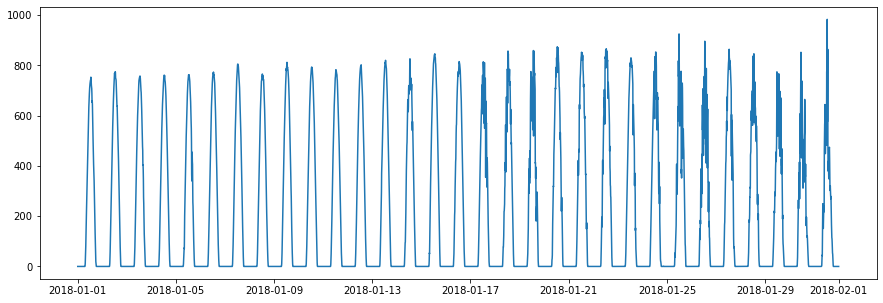

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(tmx.loc["2018-01"].Ig)
#ax.hlines(y=enero.mean(), xmin=enero.index[0], xmax=enero.index[-1])

In [3]:
tmx.resample("H").mean()

,Ig
time,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0
...,...
2018-12-31 19:00:00,0.0
2018-12-31 20:00:00,0.0
2018-12-31 21:00:00,0.0


In [38]:
dias_mean = tmx.groupby(by=[tmx.index.hour]).mean()
dias_max  = tmx.groupby(by=[tmx.index.hour]).max()
dias_min  = tmx.groupby(by=[tmx.index.hour]).min()

<AxesSubplot:xlabel='time'>

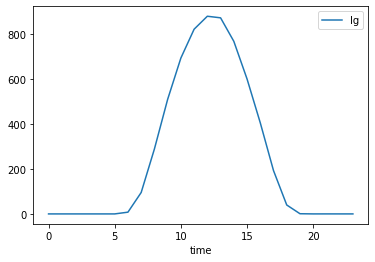

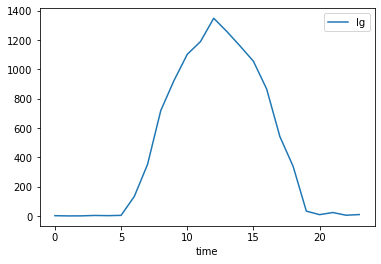

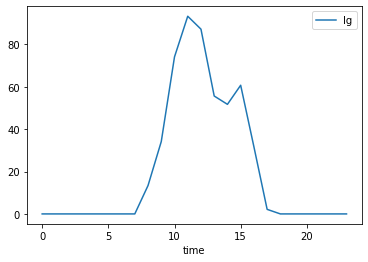

In [39]:
dias_mean.plot()
dias_max.plot()
dias_min.plot() 

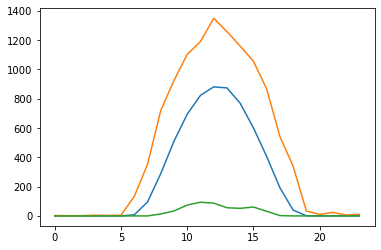

In [40]:
fig, ax = plt.subplots()
ax.plot(dias_mean)
ax.plot(dias_max)
ax.plot(dias_min)

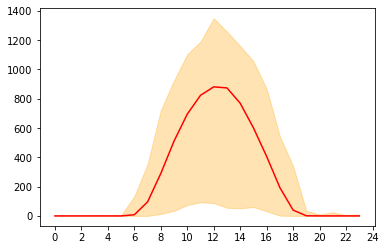

In [43]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean, color="red")
ax.set_xticks(np.arange(0,25,2));
ax.set_xticklabels(np.arange(0,25,2));

In [17]:
dias_mean = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).mean()
dias_max  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).max()
dias_min  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).min()

In [18]:
dias_mean.to_csv("../data/002_processed/temixco_ig_horario.csv")

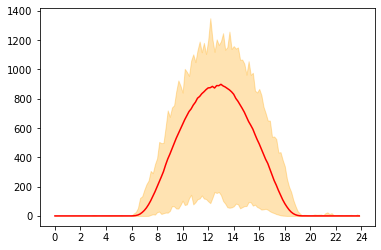

In [41]:
fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean.Ig, color="red")
ax.set_xticks(np.arange(0,145,12));
ax.set_xticklabels(np.arange(0,25,2));


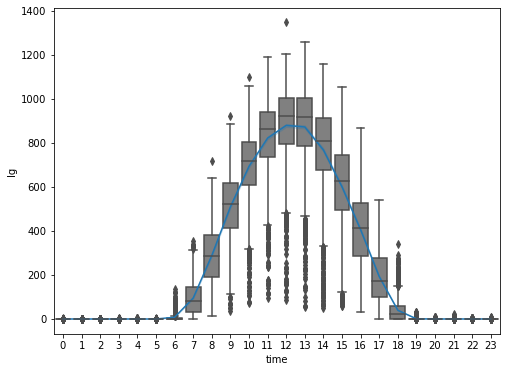

In [52]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=tmx.index.hour, y=tmx.Ig, color="gray")
ax = sns.lineplot(x=tmx.index.hour ,y=tmx.Ig, data=tmx)

In [27]:
tmx.groupby(by=(tmx.index.strftime("%H:%M"))).describe()

Ig                                                
       count      mean       std  min  25%  50%  75%     max
time                                                        
00:00  362.0  0.026025  0.170601  0.0  0.0  0.0  0.0   2.890
00:10  363.0  0.018645  0.086451  0.0  0.0  0.0  0.0   0.968
00:20  363.0  0.017623  0.087833  0.0  0.0  0.0  0.0   1.030
00:30  363.0  0.009722  0.050372  0.0  0.0  0.0  0.0   0.413
00:40  363.0  0.009344  0.051371  0.0  0.0  0.0  0.0   0.576
...      ...       ...       ...  ...  ...  ...  ...     ...
23:10  365.0  0.060608  0.523614  0.0  0.0  0.0  0.0   7.563
23:20  364.0  0.031022  0.226246  0.0  0.0  0.0  0.0   2.842
23:30  364.0  0.022805  0.104605  0.0  0.0  0.0  0.0   1.031
23:40  364.0  0.072745  0.642474  0.0  0.0  0.0  0.0  10.570
23:50  364.0  0.043148  0.217164  0.0  0.0  0.0  0.0   2.323

[144 rows x 8 columns]

In [31]:
tmx.Ig

time
2018-01-01 00:00:00    NaN
2018-01-01 00:10:00    0.0
2018-01-01 00:20:00    0.0
2018-01-01 00:30:00    0.0
2018-01-01 00:40:00    0.0
                      ... 
2018-12-31 23:10:00    0.0
2018-12-31 23:20:00    0.0
2018-12-31 23:30:00    0.0
2018-12-31 23:40:00    0.0
2018-12-31 23:50:00    0.0
Name: Ig, Length: 52560, dtype: float64

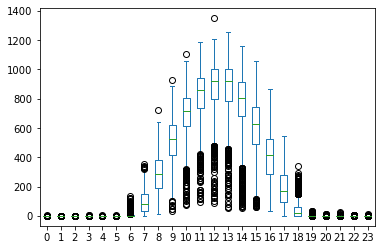

In [39]:
ax = tmx.set_index(tmx.index.hour, append=True)['Ig'].unstack().plot.box()

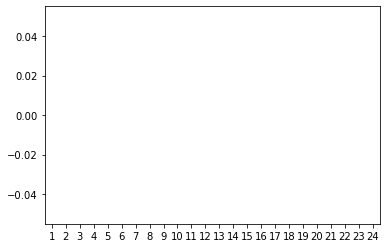

In [38]:
plt.boxplot(tmx.set_index(tmx.index.hour, append=True)['Ig'].unstack());